In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [2]:
df = pd.read_csv("estudiantes_limpio.csv")

In [3]:
df.head(5)

,genero,edad,presionAcademica,satisfaccionEstudios,sueno,alimentacion,suicidio,horasEstudio,estresFinanciero,antecedentes,depresion
0,Masculino,28,2,4,7-8 horas,Moderados,Yes,9,2,Yes,No
1,Masculino,28,4,5,5-6 horas,Saludables,Yes,7,1,Yes,No
2,Masculino,25,1,3,5-6 horas,No saludables,Yes,10,4,No,Yes
3,Masculino,23,1,4,Más de 8 horas,No saludables,Yes,7,2,Yes,No
4,Femenino,31,1,5,Más de 8 horas,Saludables,Yes,4,2,Yes,No


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   genero                502 non-null    object
 1   edad                  502 non-null    int64 
 2   presionAcademica      502 non-null    int64 
 3   satisfaccionEstudios  502 non-null    int64 
 4   sueno                 502 non-null    object
 5   alimentacion          502 non-null    object
 6   suicidio              502 non-null    object
 7   horasEstudio          502 non-null    int64 
 8   estresFinanciero      502 non-null    int64 
 9   antecedentes          502 non-null    object
 10  depresion             502 non-null    object
dtypes: int64(5), object(6)
memory usage: 43.3+ KB
None


In [5]:
df["suicidio"] = df["suicidio"].replace({"Yes": 1,"No": 0})

df["antecedentes"] = df["antecedentes"].replace({"Yes": 1,"No": 0})

df["depresion"] = df["depresion"].replace({"Yes": 1,"No": 0})

map_sueno = {
    "Más de 8 horas": 1,
    "7-8 horas": 2,
    "5-6 horas": 3,
    "Menos de 5 horas": 4
}

if "sueno" in df.columns and df["sueno"].dtype == "object":
    df["sueno"] = df["sueno"].map(map_sueno)

map_alimentacion = {
    "Saludables": 1,
    "Moderados": 2,
    "No saludables": 3
}

if "alimentacion" in df.columns and df["alimentacion"].dtype == "object":
    df["alimentacion"] = df["alimentacion"].map(map_alimentacion)

map_genero = {
    "Masculino": 0,
    "Femenino": 1
}

if "genero" in df.columns and df["genero"].dtype == "object":
    df["genero"] = df["genero"].map(map_genero)

X = df.drop(columns=["depresion"])
y = df["depresion"]




C:\Users\Usuario\AppData\Local\Temp\ipykernel_27452\3227213265.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["suicidio"] = df["suicidio"].replace({"Yes": 1,"No": 0})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_27452\3227213265.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["antecedentes"] = df["antecedentes"].replace({"Yes": 1,"No": 0})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_27452\3227213265.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   genero                502 non-null    int64
 1   edad                  502 non-null    int64
 2   presionAcademica      502 non-null    int64
 3   satisfaccionEstudios  502 non-null    int64
 4   sueno                 502 non-null    int64
 5   alimentacion          502 non-null    int64
 6   suicidio              502 non-null    int64
 7   horasEstudio          502 non-null    int64
 8   estresFinanciero      502 non-null    int64
 9   antecedentes          502 non-null    int64
 10  depresion             502 non-null    int64
dtypes: int64(11)
memory usage: 43.3 KB
None


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [37]:
X_sin_fuertes = X.drop(columns=["suicidio"])
X_train, X_test, y_train, y_test = train_test_split(
    X_sin_fuertes, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.78      0.80      0.79        50
           1       0.80      0.78      0.79        51

    accuracy                           0.79       101
   macro avg       0.79      0.79      0.79       101
weighted avg       0.79      0.79      0.79       101



In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

joblib.dump(model, "modelo_logistico.pkl")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        51

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



['modelo_logistico.pkl']

In [32]:
df_corr = df.corr(numeric_only=True)
print(df_corr["depresion"].sort_values(ascending=False))

print(len(X_train), len(X_test))

corrs = df.corr(numeric_only=True)["depresion"].sort_values(ascending=False)
print(corrs)




depresion               1.000000
presionAcademica        0.476259
suicidio                0.466296
estresFinanciero        0.296846
horasEstudio            0.200441
alimentacion            0.186685
antecedentes            0.056087
sueno                   0.049968
genero                 -0.031683
edad                   -0.215625
satisfaccionEstudios   -0.293484
Name: depresion, dtype: float64
401 101
depresion               1.000000
presionAcademica        0.476259
suicidio                0.466296
estresFinanciero        0.296846
horasEstudio            0.200441
alimentacion            0.186685
antecedentes            0.056087
sueno                   0.049968
genero                 -0.031683
edad                   -0.215625
satisfaccionEstudios   -0.293484
Name: depresion, dtype: float64


In [9]:
import numpy as np
coeficientes = model.coef_[0]
caracteristicas = X_train.columns

df_coef = pd.DataFrame({
    "Variable": caracteristicas,
    "Coeficiente": coeficientes
}).sort_values(by="Coeficiente", ascending=False)
df_coef["Odds Ratio"] = np.exp(df_coef["Coeficiente"])
print(df_coef)

               Variable  Coeficiente  Odds Ratio
6              suicidio     5.379328  216.876446
2      presionAcademica     2.041422    7.701551
5          alimentacion     1.253193    3.501507
8      estresFinanciero     1.250118    3.490756
9          antecedentes     1.048135    2.852325
4                 sueno     0.601020    1.823979
7          horasEstudio     0.367057    1.443480
0                genero    -0.112954    0.893192
1                  edad    -0.380417    0.683576
3  satisfaccionEstudios    -1.244687    0.288031


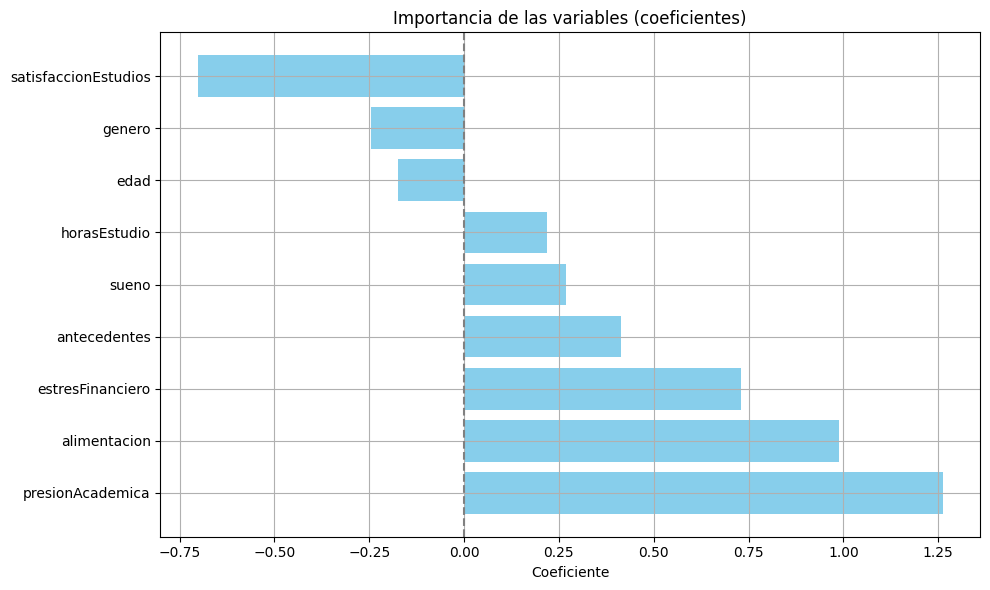

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_coef["Variable"], df_coef["Coeficiente"], color="skyblue")
plt.title("Importancia de las variables (coeficientes)")
plt.xlabel("Coeficiente")
plt.grid(True)
plt.tight_layout()
plt.axvline(0, color='gray', linestyle='--')
plt.show()

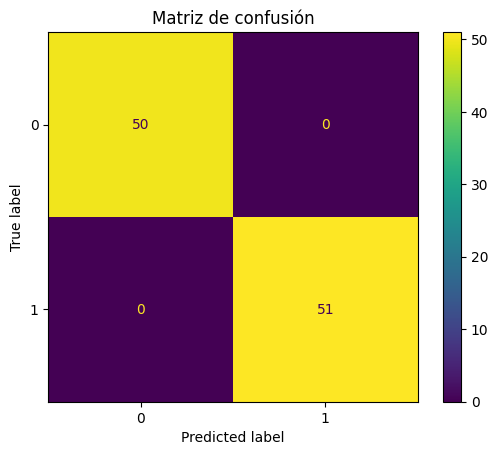

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de confusión")
plt.show()

In [12]:
from sklearn.metrics import classification_report

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
print("Probabilidades de depresión (primeros 10):")
print(y_prob[:10])

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        51

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

Probabilidades de depresión (primeros 10):
[1.11234338e-06 5.20741350e-01 9.76269881e-01 7.66450820e-01
 9.30065861e-01 5.27080116e-04 3.50266684e-01 9.80180349e-01
 6.63226852e-05 9.79509573e-01]


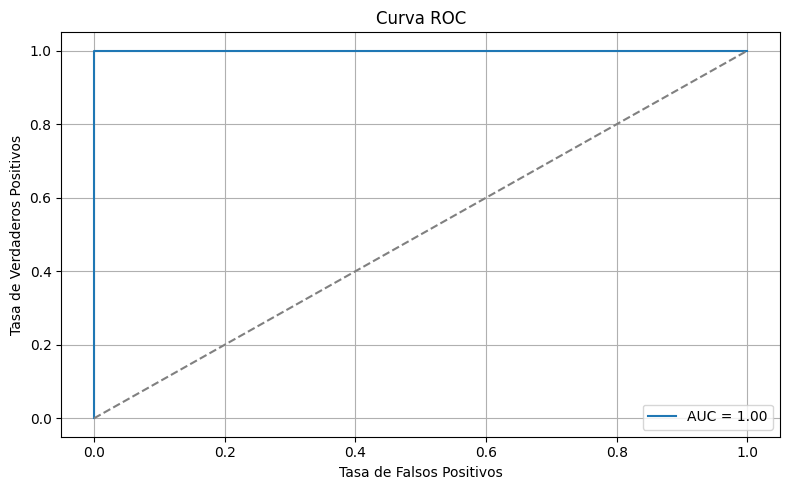

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Aciertos: {sum(y_pred == y_test)} / {len(y_test)} ({accuracy*100:.2f}%)")


Aciertos: 80 / 101 (79.21%)


In [32]:
from scipy.stats import chi2_contingency

chi2_table = []
for col in X_train.columns:
    tabla = pd.crosstab(df[col], df["depresion"])
    chi2, p, dof, expected = chi2_contingency(tabla)
    chi2_table.append((col, chi2, p))
chi2_df = pd.DataFrame(chi2_table, columns=["Variable", "Chi2", "p_value"]).sort_values("p_value")
print(chi2_df)


               Variable        Chi2       p_value
2      presionAcademica  114.129083  9.574046e-24
7      estresFinanciero   44.630489  4.745177e-09
3  satisfaccionEstudios   43.446001  8.361544e-09
5          alimentacion   18.069215  1.192119e-04
1                  edad   36.338636  2.595914e-03
6          horasEstudio   26.843329  8.138546e-03
8          antecedentes    1.362454  2.431126e-01
4                 sueno    2.211071  5.297710e-01
0                genero    0.384930  5.349766e-01


In [33]:
import statsmodels.api as sm
X_sm = sm.add_constant(X_train)
modelo_sm = sm.Logit(y_train, X_sm).fit()
print(modelo_sm.summary())


ModuleNotFoundError: No module named 'statsmodels'